# **Cat or Dog: Image Prediction**

## **Image Classification using support Vector Machine**

 image copyright: RexiPets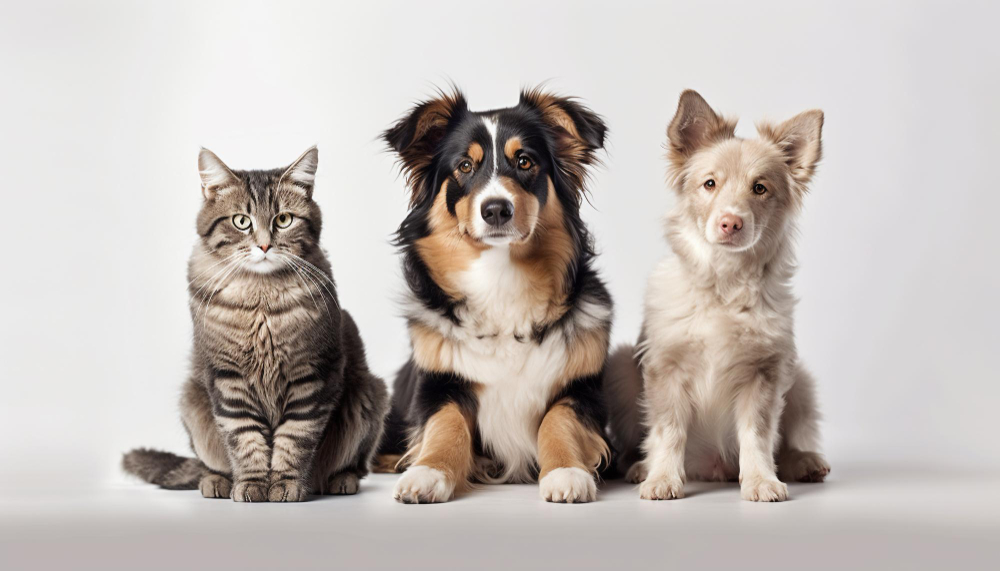

### **Mounting Google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Importing Libararies**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import os
from skimage.io import imread
from sklearn.model_selection import train_test_split
from skimage.transform import resize

### **Reading the source files from drive**

In [ ]:
os.listdir('/content/drive/MyDrive/Data')

['Cat', 'Dog', 'dog_pic.jpg', 'cat_pic.jpg']

In [ ]:
len(os.listdir('/content/drive/MyDrive/Data/Cat'))

92

In [ ]:
len(os.listdir('/content/drive/MyDrive/Data/Dog'))

82

In [ ]:
catpath =os.path.join('/content/drive/MyDrive/Data','Cat')
for img in os.listdir(catpath):
  print(img)

cat.118.jpg
cat.117.jpg
cat.119.jpg
cat.116.jpg
cat.114.jpg
cat.112.jpg
cat.113.jpg
cat.115.jpg
cat.110.jpg
cat.111.jpg
cat.108.jpg
cat.107.jpg
cat.109.jpg
c7e707b25334dbbbfcd5c80a20fcf935.jpg
cat.104.jpg
cat.105.jpg
cat.101.jpg
cat.100.jpg
cat.102.jpg
cat.103.jpg
11810af3b2bc8a85180792b9b4982d00.jpg
cat.106.jpg
cat.63.jpg
cat.61.jpg
cat.60.jpg
cat.57.jpg
cat.56.jpg
cat.58.jpg
cat.59.jpg
cat.55.jpg
cat.53.jpg
cat.52.jpg
cat.54.jpg
cat.51.jpg
cat.45.jpg
cat.41.jpg
cat.37.jpg
cat.36.jpg
cat.39.jpg
cat.40.jpg
cat.35.jpg
cat.38.jpg
cat.43.jpg
cat.46.jpg
cat.47.jpg
cat.42.jpg
cat.44.jpg
cat.48.jpg
cat.50.jpg
cat.49.jpg
cat.94.jpg
cat.86.jpg
cat.91.jpg
cat.90.jpg
cat.88.jpg
cat.89.jpg
cat.87.jpg
cat.84.jpg
cat.82.jpg
cat.85.jpg
cat.83.jpg
cat.74.jpg
cat.81.jpg
cat.80.jpg
cat.79.jpg
cat.77.jpg
cat.66.jpg
cat.65.jpg
cat.64.jpg
cat.62.jpg
cat.71.jpg
cat.69.jpg
cat.70.jpg
cat.68.jpg
cat.78.jpg
cat.75.jpg
cat.73.jpg
cat.72.jpg
cat.76.jpg
cat.67.jpg
IMG_20240509_140737.jpg
IMG_20240509_140811.jpg


In [ ]:
dogpath =os.path.join('/content/drive/MyDrive/Data','Dog')
for img in os.listdir(dogpath):
  print(img)

dog.21.jpg
dog.19.jpg
dog.16.jpg
dog.17.jpg
dog.18.jpg
dog.14.jpg
dog.15.jpg
dog.11.jpg
dog.10.jpg
dog.12.jpg
dog.13.jpg
dog.1.jpg
c2016391019b8c1e13c630b400f8000b.jpg
25c201c1f3894a74d8de988a28c1593a.jpg
4b457dd8c530dd92f7c9f797e906d548.jpg
4faa5f2302b26032681da8beea22a0bc.jpg
06a63809fe269a6159a6f12c27f73fe4.jpg
dog.46.jpg
dog.43.jpg
dog.45.jpg
dog.44.jpg
dog.41.jpg
dog.40.jpg
dog.42.jpg
dog.38.jpg
dog.39.jpg
dog.4.jpg
dog.23.jpg
dog.25.jpg
dog.24.jpg
dog.27.jpg
dog.22.jpg
dog.2.jpg
dog.20.jpg
dog.28.jpg
dog.37.jpg
dog.36.jpg
dog.34.jpg
dog.33.jpg
dog.31.jpg
dog.35.jpg
dog.32.jpg
dog.3.jpg
dog.29.jpg
dog.30.jpg
dog.26.jpg
IMG_20240509_140845.jpg
dog.8.jpg
dog.9.jpg
fd135b9b2f32a4dd7b26bdbfc35ba245.jpg
dog.7.jpg
dog.68.jpg
dog.66.jpg
dog.65.jpg
dog.67.jpg
dog.64.jpg
dog.60.jpg
dog.63.jpg
dog.6.jpg
dog.61.jpg
dog.62.jpg
dog.59.jpg
dog.47.jpg
dog.5.jpg
dog.50.jpg
dog.51.jpg
dog.48.jpg
dog.57.jpg
dog.56.jpg
dog.54.jpg
dog.53.jpg
dog.55.jpg
dog.58.jpg
dog.52.jpg
dog.49.jpg
265795fa58b318c

### **Loading and Flattening the images**

In [ ]:
flat_data_arr=[]   # This list is used to collect input data
target_arr=[]  # This list is used to collect output data
categories=['Cat','Dog']
datadir='/content/drive/MyDrive/Data'

In [ ]:
for i in categories:
  print(f'Loading....categories:{i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_arr=imread(os.path.join(path,img))
    img_resized=resize(img_arr,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(categories.index(i))
    print(f'loaded category :{i} successfully')

Loading....categories:Cat
loaded category :Cat successfully
loaded category :Cat successfully
loaded category :Cat successfully
loaded category :Cat successfully
loaded category :Cat successfully
loaded category :Cat successfully
loaded category :Cat successfully
loaded category :Cat successfully
loaded category :Cat successfully
loaded category :Cat successfully
loaded category :Cat successfully
loaded category :Cat successfully
loaded category :Cat successfully
loaded category :Cat successfully
loaded category :Cat successfully
loaded category :Cat successfully
loaded category :Cat successfully
loaded category :Cat successfully
loaded category :Cat successfully
loaded category :Cat successfully
loaded category :Cat successfully
loaded category :Cat successfully
loaded category :Cat successfully
loaded category :Cat successfully
loaded category :Cat successfully
loaded category :Cat successfully
loaded category :Cat successfully
loaded category :Cat successfully
loaded category :Cat s

### **Converting Flattened data into array then DataFrame**

In [ ]:
flat_data=np.array(flat_data_arr)
target_data=np.array(target_arr)

df=pd.DataFrame(flat_data)
df

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.133865,0.169159,0.227983,0.139061,0.174355,0.233178,0.146083,0.181377,0.240201,0.154350,...,0.220043,0.393147,0.302954,0.235383,0.403715,0.313519,0.250717,0.403302,0.313106,0.250361
1,0.690643,0.655349,0.620055,0.668931,0.633637,0.598343,0.633781,0.598487,0.563193,0.659908,...,0.318022,0.386296,0.339402,0.332629,0.360732,0.320658,0.324061,0.381313,0.342097,0.346018
2,0.182703,0.198389,0.131723,0.190831,0.206517,0.139850,0.197911,0.213598,0.146931,0.195602,...,0.476392,0.368957,0.404210,0.463188,0.350308,0.385605,0.444680,0.332355,0.367652,0.426739
3,0.543469,0.309933,0.657138,0.607466,0.383264,0.757665,0.657768,0.444959,0.841597,0.707226,...,0.092570,0.150437,0.065243,0.094262,0.171408,0.084777,0.137369,0.202884,0.096881,0.156081
4,0.501254,0.234587,0.089479,0.513243,0.245789,0.099058,0.521067,0.250470,0.097318,0.524418,...,0.085760,0.511770,0.221556,0.084336,0.509804,0.216474,0.088646,0.504610,0.210493,0.088381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,0.072660,0.029205,0.032465,0.084866,0.019753,0.004182,0.086620,0.010544,0.015931,0.084409,...,0.667029,0.900217,0.834619,0.667034,0.884797,0.815582,0.662750,0.879771,0.801749,0.653911
170,0.896984,0.701771,0.361499,0.893355,0.696336,0.363372,0.886810,0.693784,0.340850,0.887225,...,0.770076,0.870967,0.843287,0.772813,0.877484,0.850033,0.779445,0.873502,0.846051,0.775462
171,0.240157,0.254998,0.268471,0.294998,0.306934,0.329192,0.348139,0.360018,0.391694,0.361518,...,0.069352,0.132656,0.091020,0.073913,0.153732,0.094538,0.075139,0.165341,0.092653,0.069803
172,0.876014,0.876014,0.915229,0.874914,0.874914,0.914130,0.876168,0.876168,0.915384,0.888284,...,0.750605,0.785129,0.714504,0.714517,0.681435,0.609746,0.609417,0.275158,0.193222,0.189439


In [ ]:
df['Target']=target_data
df.shape

(174, 67501)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.133865,0.169159,0.227983,0.139061,0.174355,0.233178,0.146083,0.181377,0.240201,0.154350,...,0.393147,0.302954,0.235383,0.403715,0.313519,0.250717,0.403302,0.313106,0.250361,0
1,0.690643,0.655349,0.620055,0.668931,0.633637,0.598343,0.633781,0.598487,0.563193,0.659908,...,0.386296,0.339402,0.332629,0.360732,0.320658,0.324061,0.381313,0.342097,0.346018,0
2,0.182703,0.198389,0.131723,0.190831,0.206517,0.139850,0.197911,0.213598,0.146931,0.195602,...,0.368957,0.404210,0.463188,0.350308,0.385605,0.444680,0.332355,0.367652,0.426739,0
3,0.543469,0.309933,0.657138,0.607466,0.383264,0.757665,0.657768,0.444959,0.841597,0.707226,...,0.150437,0.065243,0.094262,0.171408,0.084777,0.137369,0.202884,0.096881,0.156081,0
4,0.501254,0.234587,0.089479,0.513243,0.245789,0.099058,0.521067,0.250470,0.097318,0.524418,...,0.511770,0.221556,0.084336,0.509804,0.216474,0.088646,0.504610,0.210493,0.088381,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,0.072660,0.029205,0.032465,0.084866,0.019753,0.004182,0.086620,0.010544,0.015931,0.084409,...,0.900217,0.834619,0.667034,0.884797,0.815582,0.662750,0.879771,0.801749,0.653911,1
170,0.896984,0.701771,0.361499,0.893355,0.696336,0.363372,0.886810,0.693784,0.340850,0.887225,...,0.870967,0.843287,0.772813,0.877484,0.850033,0.779445,0.873502,0.846051,0.775462,1
171,0.240157,0.254998,0.268471,0.294998,0.306934,0.329192,0.348139,0.360018,0.391694,0.361518,...,0.132656,0.091020,0.073913,0.153732,0.094538,0.075139,0.165341,0.092653,0.069803,1
172,0.876014,0.876014,0.915229,0.874914,0.874914,0.914130,0.876168,0.876168,0.915384,0.888284,...,0.785129,0.714504,0.714517,0.681435,0.609746,0.609417,0.275158,0.193222,0.189439,1


### **Seperating input Features and targets**

In [ ]:
x=df.iloc[:,:-1]
x

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.133865,0.169159,0.227983,0.139061,0.174355,0.233178,0.146083,0.181377,0.240201,0.154350,...,0.220043,0.393147,0.302954,0.235383,0.403715,0.313519,0.250717,0.403302,0.313106,0.250361
1,0.690643,0.655349,0.620055,0.668931,0.633637,0.598343,0.633781,0.598487,0.563193,0.659908,...,0.318022,0.386296,0.339402,0.332629,0.360732,0.320658,0.324061,0.381313,0.342097,0.346018
2,0.182703,0.198389,0.131723,0.190831,0.206517,0.139850,0.197911,0.213598,0.146931,0.195602,...,0.476392,0.368957,0.404210,0.463188,0.350308,0.385605,0.444680,0.332355,0.367652,0.426739
3,0.543469,0.309933,0.657138,0.607466,0.383264,0.757665,0.657768,0.444959,0.841597,0.707226,...,0.092570,0.150437,0.065243,0.094262,0.171408,0.084777,0.137369,0.202884,0.096881,0.156081
4,0.501254,0.234587,0.089479,0.513243,0.245789,0.099058,0.521067,0.250470,0.097318,0.524418,...,0.085760,0.511770,0.221556,0.084336,0.509804,0.216474,0.088646,0.504610,0.210493,0.088381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,0.072660,0.029205,0.032465,0.084866,0.019753,0.004182,0.086620,0.010544,0.015931,0.084409,...,0.667029,0.900217,0.834619,0.667034,0.884797,0.815582,0.662750,0.879771,0.801749,0.653911
170,0.896984,0.701771,0.361499,0.893355,0.696336,0.363372,0.886810,0.693784,0.340850,0.887225,...,0.770076,0.870967,0.843287,0.772813,0.877484,0.850033,0.779445,0.873502,0.846051,0.775462
171,0.240157,0.254998,0.268471,0.294998,0.306934,0.329192,0.348139,0.360018,0.391694,0.361518,...,0.069352,0.132656,0.091020,0.073913,0.153732,0.094538,0.075139,0.165341,0.092653,0.069803
172,0.876014,0.876014,0.915229,0.874914,0.874914,0.914130,0.876168,0.876168,0.915384,0.888284,...,0.750605,0.785129,0.714504,0.714517,0.681435,0.609746,0.609417,0.275158,0.193222,0.189439


In [ ]:
y=df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
169    1
170    1
171    1
172    1
173    1
Name: Target, Length: 174, dtype: int64

### **Splitting into Train and Test Data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0,stratify=y)

### **Model Creation**

In [ ]:
from sklearn.svm import SVC
model=SVC(probability=True)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0])

### **Performance Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix
matrix=confusion_matrix(y_test,y_pred)
score=accuracy_score(y_test,y_pred)
matrix

array([[13,  6],
       [ 6, 10]])

In [ ]:
score

0.6571428571428571

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68        19
           1       0.62      0.62      0.62        16

    accuracy                           0.66        35
   macro avg       0.65      0.65      0.65        35
weighted avg       0.66      0.66      0.66        35



### **Prediction**

Cat = 51.88637294079612%
Dog = 48.11362705920387%
The predicted image is :Cat


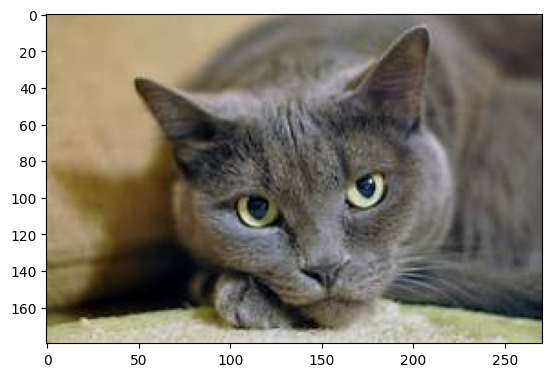

In [ ]:
path1='/content/drive/MyDrive/Data/cat_pic.jpg'
img1=imread(path1)
plt.imshow(img1)
img1=resize(img1,(150,150,3)).flatten().reshape(1,-1)
model.predict(img1)
probability=model.predict_proba(img1)
for ind,val in enumerate(categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is :" +categories[model.predict(img1)[0]])

Cat = 43.62235413532861%
Dog = 56.377645864671386%
The predicted image is :Dog


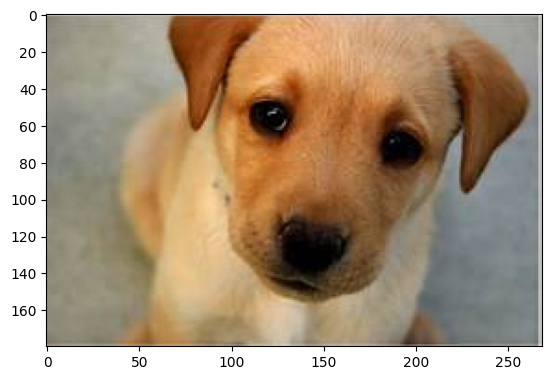

In [ ]:
path2='/content/drive/MyDrive/Data/dog_pic.jpg'
img2=imread(path2)
plt.imshow(img2)
img2=resize(img2,(150,150,3)).flatten().reshape(1,-1)
model.predict(img2)
probability=model.predict_proba(img2)
for ind,val in enumerate(categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is :" +categories[model.predict(img2)[0]])